# Logistic Regression - Churn Prediction Project

### Problem Statement:

We want to predict whether a customer will churn (Churn column) based on various features like demographics (gender, SeniorCitizen, etc.), service details (tenure, InternetService, etc.), and financial data (MonthlyCharges, TotalCharges)

## Data preparation
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all columns read correctly
- Check if the churn variable needs any preparation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head(1)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [10]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
totalcharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [14]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [15]:
df.churn = (df.churn == 'yes').astype('int')

In [16]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## Data Preparation

In [18]:
X = df.drop(columns=['customerid', 'churn'])
y = df['churn']

In [19]:
from sklearn.model_selection import train_test_split

In [81]:
train_inputs, test_inputs, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
len(train_inputs), len(test_inputs)

(5634, 1409)

In [85]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes('object').columns

In [87]:
num_cols

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

In [89]:
cat_cols = cat_cols.drop(['customerid'])
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

#### Encoding

In [92]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [94]:
encoder = OneHotEncoder(drop='first')

In [96]:
train_cat = encoder.fit_transform(train_inputs[cat_cols])

In [98]:
test_cat = encoder.transform(test_inputs[cat_cols])

### Scaling

In [101]:
scaler = StandardScaler()

In [103]:
num_cols = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [105]:
train_num = scaler.fit_transform(train_inputs[num_cols])

In [107]:
test_num = scaler.transform(test_inputs[num_cols])

### combine

In [110]:
train_processed = np.hstack((train_num, train_cat.toarray()))
test_processed = np.hstack((test_num, test_cat.toarray()))

## Model Selection

In [114]:
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression()

In [118]:
model.fit(train_processed, train_target)

LogisticRegression()

In [120]:
train_pred = model.predict(train_processed)

In [122]:
train_pred

array([0, 0, 1, ..., 0, 1, 0])

In [124]:
train_target

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: churn, Length: 5634, dtype: int32

In [126]:
test_pred = model.predict(test_processed)

In [128]:
test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [130]:
test_target

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: churn, Length: 1409, dtype: int32

In [132]:
data = pd.DataFrame()
data['Actual'] = test_target
data['Prediction'] = test_pred

In [134]:
data['Correct'] = data.Actual == data.Prediction

In [136]:
data

,Actual,Prediction,Correct
185,1,1,True
2715,0,0,True
3825,0,0,True
1807,1,1,True
132,0,0,True
...,...,...,...
6366,0,0,True
315,0,0,True
2439,0,0,True
5002,0,0,True


## Classification Metrics

Classification metrics are used to evaluate the performance of a classification model. These metrics provide insight into how well the model is able to predict the target variable, typically when the output is categorical. Here are the most common classification metrics:

### 1. Accuracy
**Definition**: The ratio of correctly predicted observations to the total observations.  
**Formula**:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Where:
- **TP (True Positives)**: Correctly predicted positive class.
- **TN (True Negatives)**: Correctly predicted negative class.
- **FP (False Positives)**: Incorrectly predicted as positive (Type I error).
- **FN (False Negatives)**: Incorrectly predicted as negative (Type II error).

**Use case**: When classes are balanced.

---

In [140]:
from sklearn.metrics import accuracy_score

In [142]:
train_acc = accuracy_score(train_target, train_pred)
train_acc

0.80386936457224

In [144]:
test_acc = accuracy_score(test_target, test_pred)
test_acc

0.8211497515968772

### 2. Precision (Positive Predictive Value)
**Definition**: The ratio of correctly predicted positive observations to the total predicted positives.  
**Formula**:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

**Use case**: Useful when the cost of false positives is high (e.g., spam detection).

---

In [146]:
from sklearn.metrics import precision_score

In [150]:
train_pre = precision_score(train_target, train_pred)
train_pre

0.6595918367346939

In [154]:
test_pre = precision_score(test_target, test_pred)
test_pre

0.6861538461538461

### 3. Recall (Sensitivity or True Positive Rate)
**Definition**: The ratio of correctly predicted positive observations to all actual positives.  
**Formula**:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

**Use case**: Important when the cost of false negatives is high (e.g., detecting rare diseases).

---

In [156]:
from sklearn.metrics import recall_score
recall = recall_score(train_target, train_pred)

In [158]:
recall

0.5401069518716578

### 4. F1-Score
**Definition**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall.  
**Formula**:
$$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

**Use case**: Used when both precision and recall are important.

---

In [160]:
from sklearn.metrics import f1_score
f1 = f1_score(train_target, train_pred)

In [162]:
f1

0.5938993017273061

### 5. Specificity (True Negative Rate)
**Definition**: The ratio of correctly predicted negative observations to all actual negatives.  
**Formula**:
$$ \text{Specificity} = \frac{TN}{TN + FP} $$

**Use case**: Useful when distinguishing true negatives is important.

---

In [177]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(train_target, train_pred).ravel()
specificity = tn / (tn + fp)


In [179]:
specificity

0.8992266795553407

### 6. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)
**Definition**: A plot that shows the trade-off between the true positive rate (recall) and the false positive rate (1 - specificity) at different thresholds. The AUC (Area Under the Curve) summarizes this as a single value.

**Use case**: Useful for evaluating model performance across various thresholds.

---


In [191]:
from sklearn.metrics import roc_auc_score, roc_curve

In [185]:
test_pred = model.predict(test_processed)
test_pred_prob = model.predict_proba(test_processed)[:, 1]

In [189]:
test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [187]:
test_pred_prob

array([0.69465992, 0.06015318, 0.00453189, ..., 0.05176934, 0.01314558,
       0.49630785])

In [193]:
roc_auc = roc_auc_score(test_target, test_pred_prob)
roc_auc

0.8622162472698667

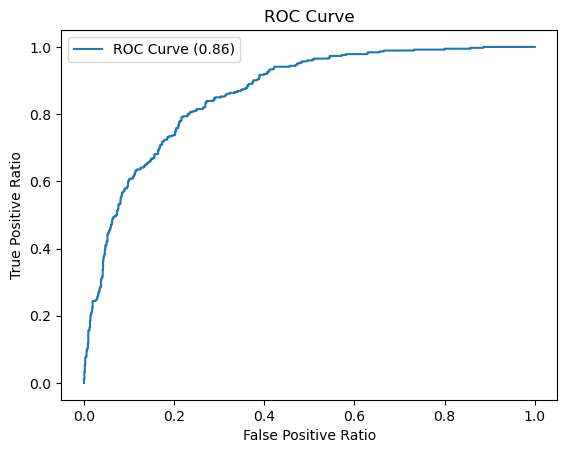

In [199]:
fpr, tpr, thresholds = roc_curve(test_target, test_pred_prob)
plt.plot(fpr, tpr, label = f'ROC Curve ({roc_auc:.2f})')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 8. Confusion Matrix
**Definition**: A table that provides a detailed breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

**Confusion Matrix Layout**:
|                   | Predicted Positive | Predicted Negative |
|-------------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

**Use case**: Provides an overview of the classification performance across all outcomes.

---

In [167]:
from sklearn.metrics import confusion_matrix

In [169]:
cm = confusion_matrix(train_pred, train_target)
cm

array([[3721,  688],
       [ 417,  808]], dtype=int64)

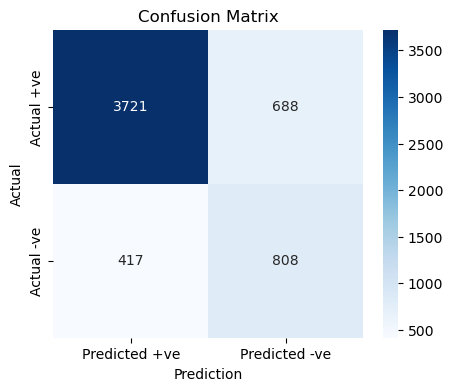

In [175]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, fmt='d', annot=True, cmap='Blues',
            xticklabels=['Predicted +ve', 'Predicted -ve'],
            yticklabels=['Actual +ve', 'Actual -ve'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()